---
Train/Test-split
---


## Problem statement

As we've seen in the previous lecture, on way to evaluate a particular regression model's fit to our training data is to calculate the loss metric (either MAE, MSE or RMSE). We then say that the model with the smallest loss to fit the data the best.

However, is the obtained results practically useful? As we'll se in this notebook, this is actually not the case. It turns out that the calculated loss metric on our training data is not a good indicator on a models usefullness. What we really want is a measure for how our model behaves on **new, unseen** data. But how can we assertain that? 

A well-working solution to this problem, as we'll see, is to split our data into two splits: a train- and a test split. Then we'll only use the train data to fit our model. The actual evaluation will then be done on the test data, which now simulates new, unseen data.

---

Importing needed libraries


In [205]:
import random

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Let's now define our loss-metrics. We'll use both MAE and RMSE here.

In [206]:
def MAE(y_true, y_predictions):

    '''Calculates the Mean Absolute Error between true values y and predicted y_hat'''
    
    initial_sum = sum([np.abs(y-y_hat) for y, y_hat in zip(y_true, y_predictions)])

    mae = initial_sum/len(y_true)

    mae_rounded = round(mae, 4)

    return mae_rounded

def RMSE(y_true, y_predictions):
    
    '''Calculates the Mean Squared Error between true values y and predicted y_hat'''
    
    initial_sum = sum([(y-y_hat)**2 for y, y_hat in zip(y_true, y_predictions)])

    mse = initial_sum/len(y_true)

    rmse = np.sqrt(mse)

    rmse_rounded = round(rmse, 4)

    return rmse_rounded

Create and plot some dummy data for demonstrative purposes

Number of training samples: 20


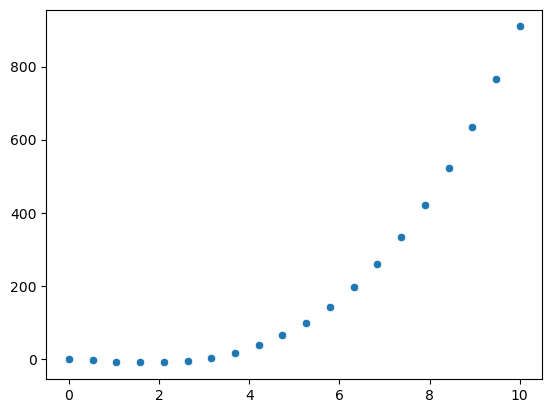

In [207]:
def f(x):

    y = x**3 - 9*x

    return y

x_vals = np.linspace(0, 10, 20)
y_vals = np.array([f(x) for x in x_vals])

print(f'Number of training samples: {len(x_vals)}')

sns.scatterplot(x=x_vals, y=y_vals);

Let's add some noise to our $y$-values, so that we get imperfect data. This is more realistic.

In other words, for each $y$

$$ y + \epsilon $$

where

$$ \epsilon \sim N(0, \sigma)

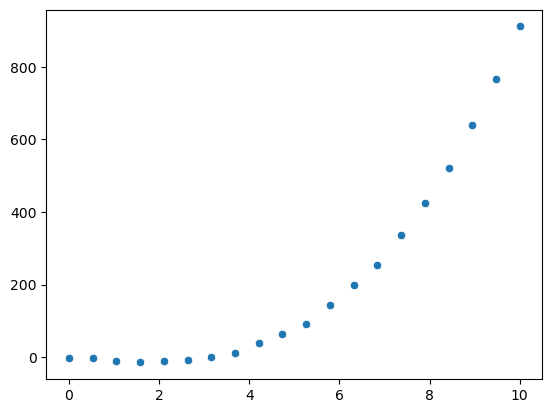

In [208]:

# Now let's add some noise to our y_vals, to mimic more realistic data

noise_std = 3.0                                     # Adjust this value to control the amount of noise
noise = np.random.normal(0, noise_std, len(y_vals)) # Generate noise from a normal distribution

# add the generated noise to our y_vals
y_vals = y_vals + noise

# plot the results
sns.scatterplot(x=x_vals, y=y_vals);

---

## Fitting models

Alright, now that we have dummy data. Let's do some quick regplots to see which degree polynomial naively fits best to this data 

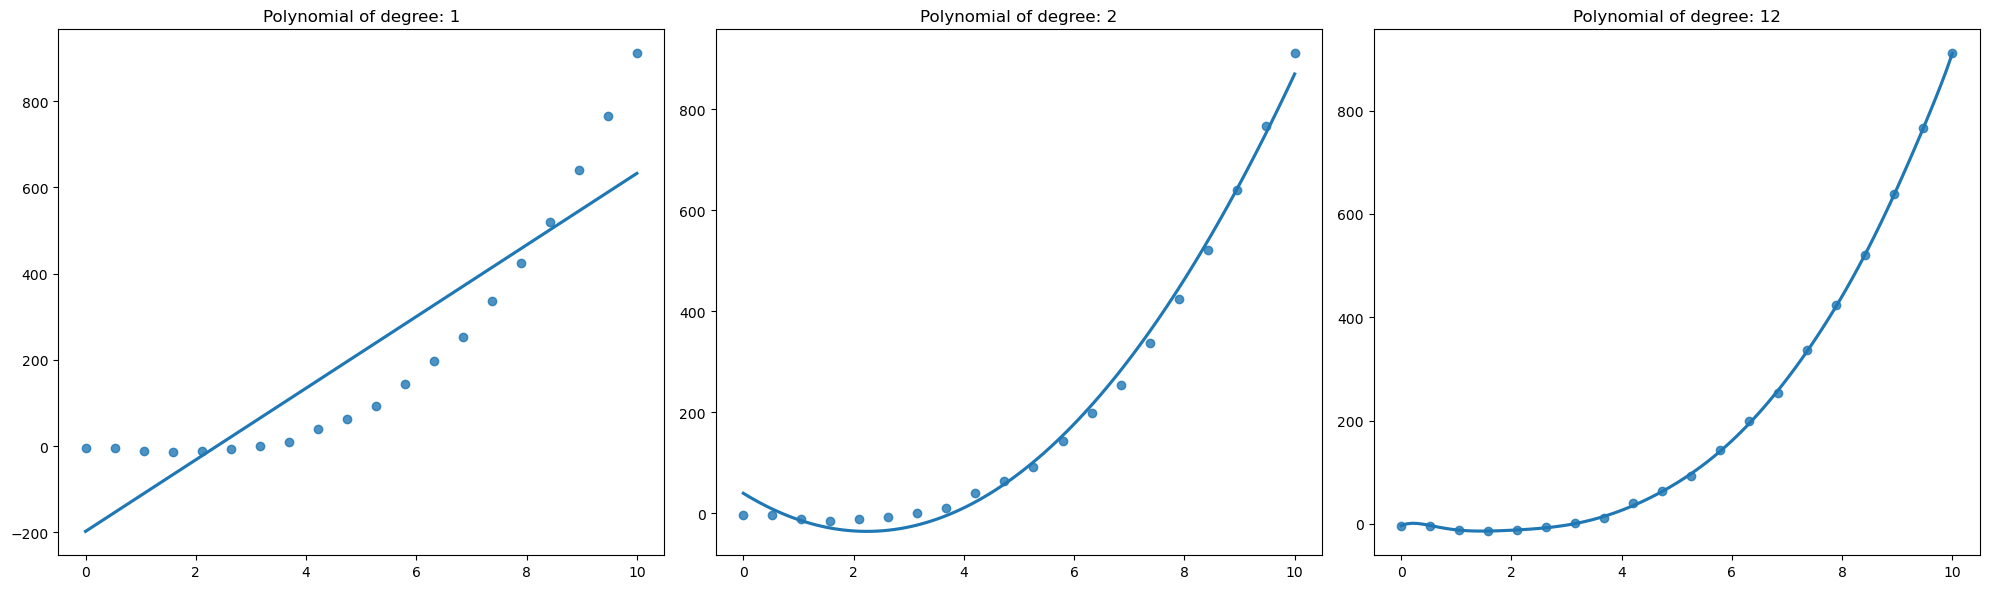

In [209]:
degrees = [1, 2, 12]

fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=100)  # Adjust figsize as needed
j = 0

for i, degree in enumerate(degrees):
    sns.regplot(x=x_vals, y=y_vals, order=degree, ax=ax[i], ci=None)
    ax[i].set_title(f"Polynomial of degree: {degree}")

fig.tight_layout()
plt.show()

**Conclusion**:

- The linear models doesn't seem to be a good model here
- The polynomial of degree 2 seems to do a much better job
- However, it looks as if the polynomial of degree 12 'fits' the data best, right? Since all $\hat{y}$ are perfect, or very close, estimates of $y$

---

## Naive loss-metric calculation

Let's confirm the conclusions above by calculating MAE and MSE for the models we've plotted. We've used polynomials of order 1,2 and 12. 

In other words, we've assumed that:

- For order 1:
$$ f_{w,b}(x) = w_1 \cdot x + b $$

- For order 2:
$$ f_{w,b}(x) = w_2 \cdot x^2 + w_1 \cdot x + b $$

- For order 12:
$$ f_{w,b}(x) = w_{12} \cdot x^{12} + w_{11} \cdot x^{11} + \ldots + w_{1} \cdot x + b $$

We'll start by **defining** the models above


In [210]:
def linear_model(x, w, b):    # a linear model is a polynomial of degree 1

    y_hat = w*x+b

    return y_hat

def polynomial_model_degree_2(x, w2, w1, b):

    y_hat = w2*x**2 + w1*x+b

    return y_hat

def polynomial_model_degree_12(x, w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b):
    
    y_hat = w12*x**12 + w11*x**11 + w10*x**10 + w9*x**9 +w8*x**8 + w7*x** 7 + w6*x**6 + w5*x**5 + w4*x**4 + w3*x**3 + w2*x**2 + w1*x + b
    
    return y_hat

Now, we can **polyfiting** in order to get the parameters. Thereafter, we'll **predict** the $\hat{y}$ of each model, and finally use them to **calculate** our loss metrics. 

In [211]:
# degree 1 (linear model)

w1, b = np.polyfit(x_vals, y_vals, deg=1)

y_hats_linear_model = np.array([linear_model(x, w1, b) for x in x_vals])

print('Polynomial of degree 1 (linear model):', end='\n\n')

linear_model_MAE = MAE(y_vals, y_hats_linear_model)
linear_model_RMSE = RMSE(y_vals, y_hats_linear_model)

print('MAE  :', linear_model_MAE)
print('RMSE :', linear_model_RMSE)

Polynomial of degree 1 (linear model):

MAE  : 107.5853
RMSE : 125.2601


In [212]:
# degree 2 

w2, w1, b = np.polyfit(x_vals, y_vals, deg=2)

y_hats_polynomial_model_degree_2 = np.array([polynomial_model_degree_2(x, w2, w1, b) for x in x_vals])

print('Polynomial of degree 2:', end='\n\n')

polynomial_model_degree_2_MAE = MAE(y_vals, y_hats_polynomial_model_degree_2)
polynomial_model_degree_2_RMSE = RMSE(y_vals, y_hats_polynomial_model_degree_2)

print('MAE  :', polynomial_model_degree_2_MAE)
print('RMSE :', polynomial_model_degree_2_RMSE)

Polynomial of degree 2:

MAE  : 18.5009
RMSE : 21.4454


In [213]:
# degree 12 

w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b = np.polyfit(x_vals, y_vals, deg=12)

y_hats_polynomial_model_degree_12 = np.array([polynomial_model_degree_12(x, w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b) for x in x_vals])

print('Polynomial of degree 12:', end='\n\n')

polynomial_model_degree_12_MAE = MAE(y_vals, y_hats_polynomial_model_degree_12)
polynomial_model_degree_12_RMSE = RMSE(y_vals, y_hats_polynomial_model_degree_12)

print('MAE  :', polynomial_model_degree_12_MAE)
print('RMSE :', polynomial_model_degree_12_RMSE)

Polynomial of degree 12:

MAE  : 1.7317
RMSE : 2.4846


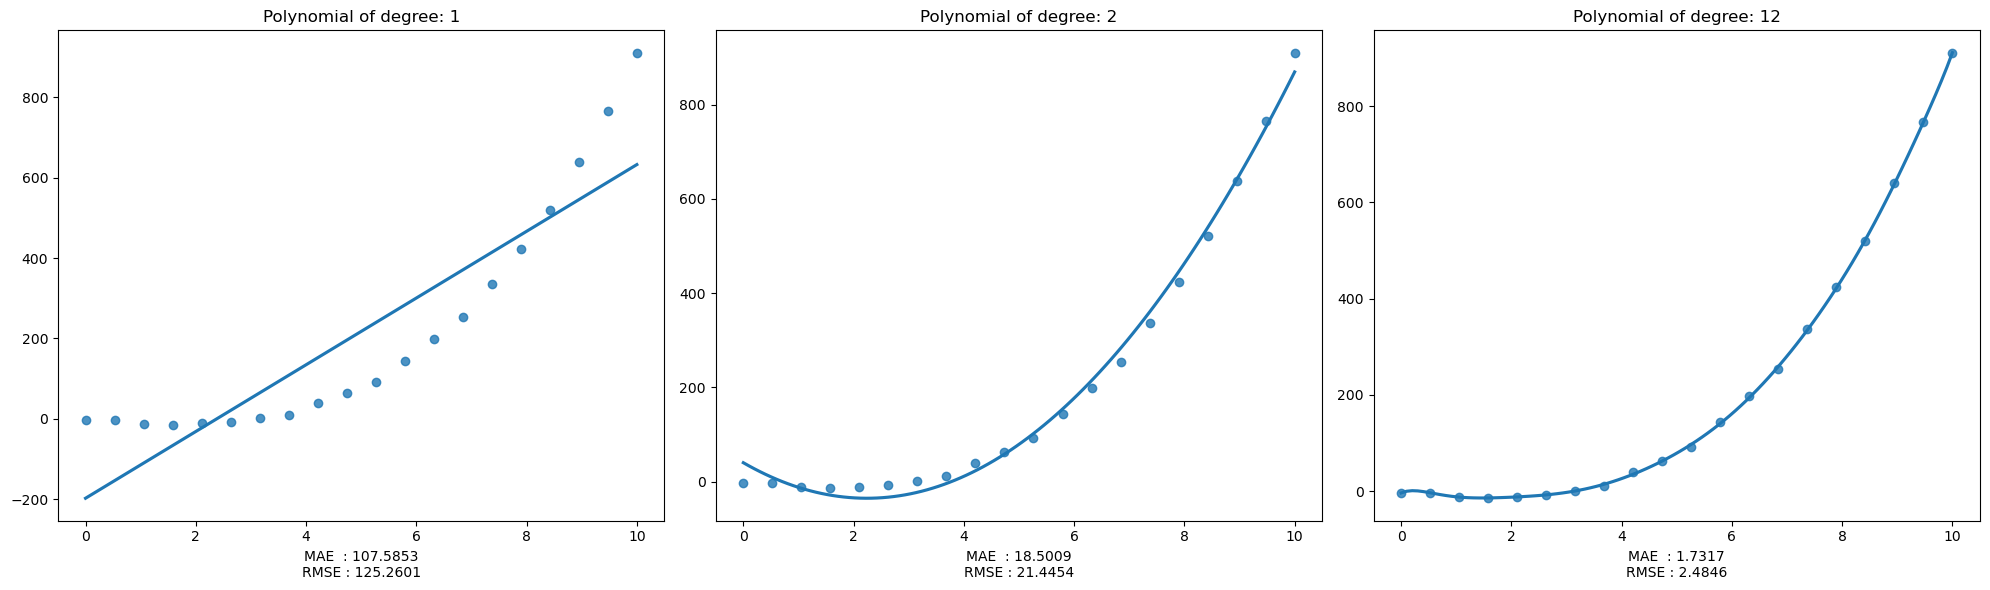

In [214]:
degrees = [1, 2, 12]
all_maes = [linear_model_MAE, polynomial_model_degree_2_MAE, polynomial_model_degree_12_MAE]
all_rmses = [linear_model_RMSE, polynomial_model_degree_2_RMSE, polynomial_model_degree_12_RMSE]


fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=100)  # Adjust figsize as needed
j = 0

for i, degree in enumerate(degrees):
    sns.regplot(x=x_vals, y=y_vals, order=degree, ax=ax[i], ci=None)
    ax[i].set_title(f"Polynomial of degree: {degree}")
    ax[i].set_xlabel(f"MAE  : {all_maes[i]}\nRMSE : {all_rmses[i]}") 

fig.tight_layout()
plt.show()

---

## This aint good enough though! 

Why? Because what we really want is to estimate the models performance on unseen data - **not** on the data that we have trained on! 

We're really only interested in how the model will be valuable to us when used in production, and we can't get a realiable estimate on that simply by how well the model fits on the data it has been trained on.

In fact, as we'll see in the deep learning course, it is always possible to achieve a loss (e.g. MAE) of 0 on the data you've trained on.

*Thus, in order to to simulate performance on data the model has not been trained on*, we will split our total training data into two sets

1. a train set
2. a test set

The training set will be used exclusively to fit our model, while the testing set then will be what we calculate our loss on. If we get a good performance on the test set, we'll have good reasons to believe that the model is actually useful!

**Let's demonstrate the concept**

---

## Train/test split

It's very easy to split our data into a training- and testing set. Usually, we do a 80/20 random split.

However, do not that the ratio of splits can be very different depending on circumstances - but 80/20 is a good starting point.

In [215]:
# We will use scikit-learn to split our data

# scikit-learn is a Python library with tons of useful functions and methods to train ml-models

from sklearn.model_selection import train_test_split  


x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2)       # this function splits our data completely randomly each time you call it


print('original data:')
print(f'number of x_values: {len(x_vals)}')
print(f'number of y_values: {len(y_vals)}', end='\n\n')

print('train data:')
print(f'number of x_values: {len(x_train)}')
print(f'number of y_values: {len(y_train)}', end='\n\n')

print('test data:')
print(f'number of x_values: {len(x_test)}')
print(f'number of y_values: {len(y_test)}')

original data:
number of x_values: 20
number of y_values: 20

train data:
number of x_values: 16
number of y_values: 16

test data:
number of x_values: 4
number of y_values: 4


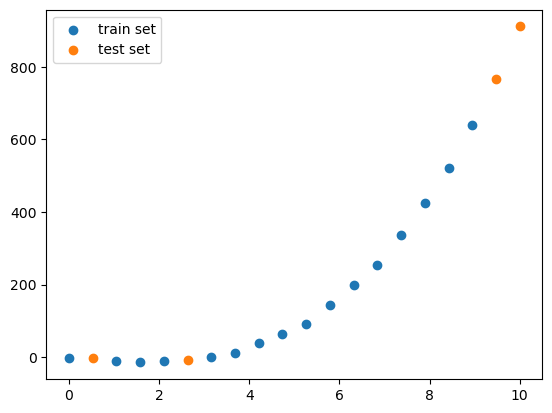

In [216]:
# Visualize our splits

plt.scatter(x_train, y_train, label='train set')
plt.scatter(x_test, y_test, label='test set')

plt.legend()
plt.show()



Now let's fit our polynomials of degree 1, 2 and 12 using only data from the train set, and plot it again.

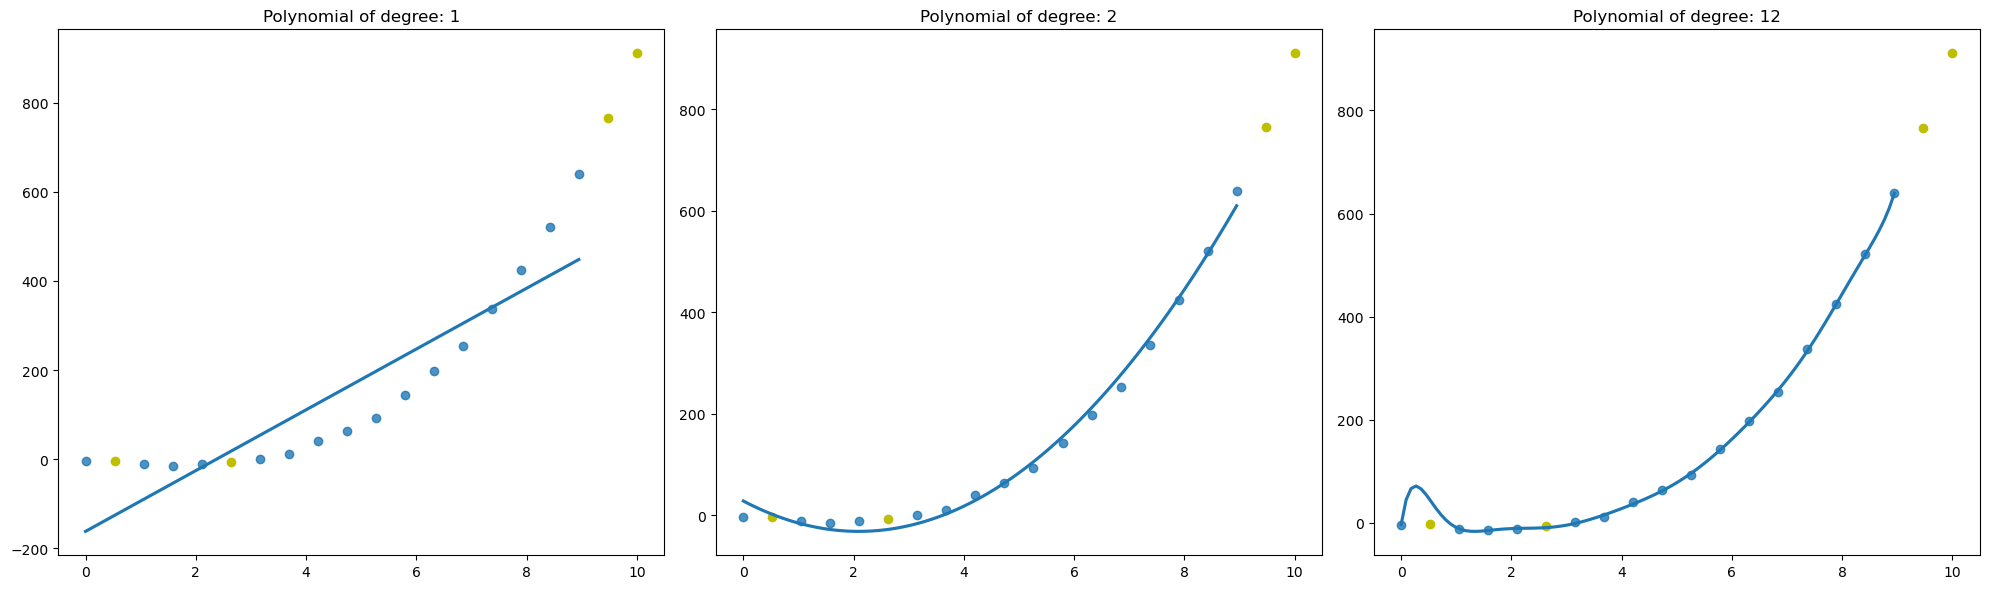

In [217]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=100)  # Adjust figsize as needed
j = 0

for i, degree in enumerate(degrees):
    sns.regplot(x=x_train, y=y_train, order=degree, ax=ax[i], ci=None)   # note that we fit our models only on the train data here
    ax[i].scatter(x_test, y_test, color='y')
    ax[i].set_title(f"Polynomial of degree: {degree}")

fig.tight_layout()
plt.show()

Now let's fit our polynomials of degree 1, 2 and 12 using only data from the train set. Then, we'll evaluate our loss on both the train and the test set - the latter of which has not been seen on the test set

This process is all going to be easier using scikit-learn, but we do this explicitly now just to showcase the process.

To be clear, this is what we're going to do:

For each polynoimal degree of 1,2 and 12:

    1. Fit a model using only the training data
    2. Use that model to predict y_hat for all x in the train and test data (the latter of which we havnt seen during training)
    3. Calculate MAE and RMSE for both train and test data

In [218]:
# degree 1 (linear model)

w1, b = np.polyfit(x_train, y_train, deg=1)    # note that we fit only on the train set here

y_hats_train_linear_model = np.array([linear_model(x, w1, b) for x in x_train])   # predict y_hats for the train set
y_hats_test_linear_model = np.array([linear_model(x, w1, b) for x in x_test])     # predict y_hats for the test set

print('Polynomial of degree 1 (linear model):', end='\n\n')

linear_model_train_MAE = MAE(y_train, y_hats_train_linear_model)       # calculate MAE for train set
linear_model_train_RMSE = RMSE(y_train, y_hats_train_linear_model)     # calculate RMSE for train set

linear_model_test_MAE = MAE(y_test, y_hats_test_linear_model)          # calculate MAE for test set
linear_model_test_RMSE = RMSE(y_test, y_hats_test_linear_model)        # calculate RMSE for test set

print('Train:')
print('MAE :', linear_model_train_MAE)
print('RMSE:', linear_model_train_RMSE, end='\n\n')

print('Test:')
print('MAE :', linear_model_test_MAE)
print('RMSE:', linear_model_test_RMSE)

Polynomial of degree 1 (linear model):

Train:
MAE : 78.9234
RMSE: 92.0397

Test:
MAE : 205.1964
RMSE: 249.2039


In [219]:
# degree 2 

w2, w1, b = np.polyfit(x_train, y_train, deg=2)     # note that we fit only on the train set here

y_hats_train_polynomial_model_degree_2 = np.array([polynomial_model_degree_2(x, w2, w1, b) for x in x_train])  # predict y_hats for the train set
y_hats_test_polynomial_model_degree_2 = np.array([polynomial_model_degree_2(x, w2, w1, b) for x in x_test])    # predict y_hats for the test set

print('Polynomial of degree 2:', end='\n\n')

polynomial_model_train_degree_2_MAE = MAE(y_train, y_hats_train_polynomial_model_degree_2)            # calculate MAE for train set
polynomial_model_train_degree_2_RMSE = RMSE(y_train, y_hats_train_polynomial_model_degree_2)           # calculate MAE for test set

polynomial_model_test_degree_2_MAE = MAE(y_test, y_hats_test_polynomial_model_degree_2)               # calculate MSE for train set
polynomial_model_test_degree_2_RMSE = RMSE(y_test, y_hats_test_polynomial_model_degree_2)             # calculate MSE for test set

print('Train:')
print('MAE :', polynomial_model_train_degree_2_MAE)
print('RMSE:', polynomial_model_train_degree_2_RMSE, end='\n\n')

print('Test')
print('MAE :', polynomial_model_test_degree_2_MAE)
print('RMSE:', polynomial_model_test_degree_2_RMSE)

Polynomial of degree 2:

Train:
MAE : 13.6892
RMSE: 16.1022

Test
MAE : 42.009
RMSE: 52.8301


In [220]:
# degree 12 
 

w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b = np.polyfit(x_train, y_train, deg=12)   # note that we fit only on the train set here

# predict y_hats for the train set
# predict y_hats for the test set

y_hats_train_polynomial_model_degree_12 = np.array([polynomial_model_degree_12(x, w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b) for x in x_train])
y_hats_test_polynomial_model_degree_12 = np.array([polynomial_model_degree_12(x, w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b) for x in x_test])

print('Polynomial of degree 12:', end='\n\n')

polynomial_model_train_degree_12_MAE = MAE(y_train, y_hats_train_polynomial_model_degree_12)            # calculate MAE for train set
polynomial_model_train_degree_12_RMSE = RMSE(y_train, y_hats_train_polynomial_model_degree_12)          # calculate MAE for test set

polynomial_model_test_degree_12_MAE = MAE(y_test, y_hats_test_polynomial_model_degree_12)               # calculate MSE for train set
polynomial_model_test_degree_12_RMSE = RMSE(y_test, y_hats_test_polynomial_model_degree_12)             # calculate MSE for test set

print('Train:')
print('MAE :', polynomial_model_train_degree_12_MAE)
print('RMSE:', polynomial_model_train_degree_12_RMSE, end='\n\n')

print('Test:')
print('MAE :', polynomial_model_test_degree_12_MAE)
print('RMSE:', polynomial_model_test_degree_12_RMSE)

Polynomial of degree 12:

Train:
MAE : 1.8442
RMSE: 2.4392

Test:
MAE : 628.1816
RMSE: 1088.2518


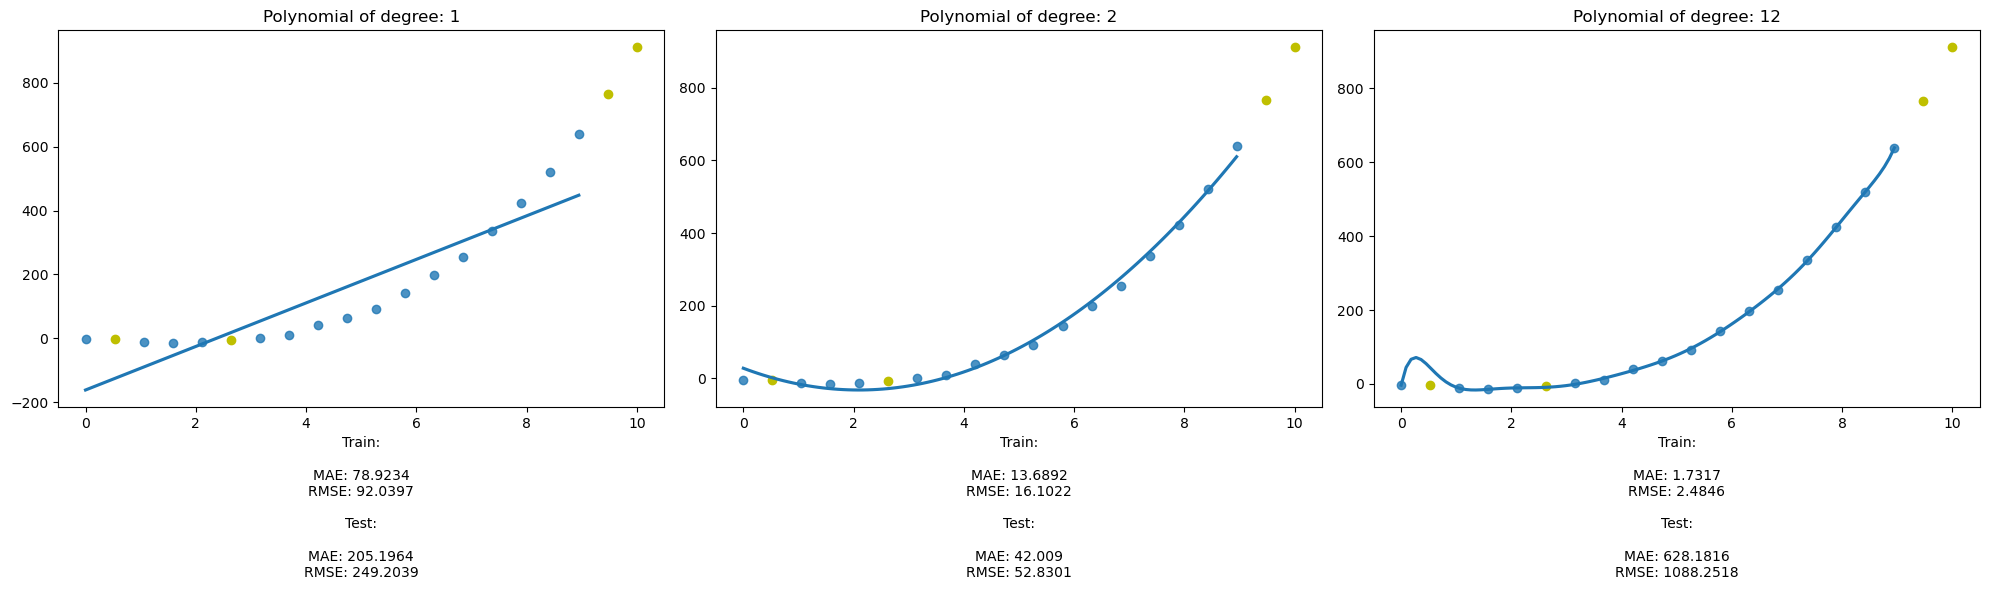

In [221]:
# plot the results so that we can see what we've done

degrees = [1, 2, 12]
all_train_maes = [linear_model_train_MAE, polynomial_model_train_degree_2_MAE, polynomial_model_degree_12_MAE]
all_train_mses = [linear_model_train_RMSE, polynomial_model_train_degree_2_RMSE, polynomial_model_degree_12_RMSE]

all_test_maes = [linear_model_test_MAE, polynomial_model_test_degree_2_MAE, polynomial_model_test_degree_12_MAE]
all_test_mses = [linear_model_test_RMSE, polynomial_model_test_degree_2_RMSE, polynomial_model_test_degree_12_RMSE]


fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=100) 

for i, degree in enumerate(degrees):
    sns.regplot(x=x_train, y=y_train, order=degree, ax=ax[i], ci=None)
    ax[i].scatter(x_test, y_test, color='y')
    ax[i].set_title(f"Polynomial of degree: {degree}")
    ax[i].set_xlabel(f"Train:\n\nMAE: {all_train_maes[i]}\nRMSE: {all_train_mses[i]}\n\nTest:\n\nMAE: {all_test_maes[i]}\nRMSE: {all_test_mses[i]}") 

fig.tight_layout()
plt.show()

---

# Conclusion

We've seen that a low loss on only the train set is **not** a good indicator of performance on unseen data - which is what we require for the model to be actually useful.


**Underfit**

A model that has too little flexibility in relation to the data we train it on, will usually have poor performance on both the train and test data. We then say that the model is underfit. In our example, this is the case for the linear model.

**Good fit**

A model that has just the right amount of flexilibity will generally achieve good performance on both the train and test data. The goal in ML is thus to fit models to our data with as low test set loss as possible - since this likely entails the best performance on unseen data. In our example, this is the case for the polynomial model of degree 2.

**Overfit**

As a model becomes more and more flexible, i.e, it's ability to fit training data increases - we risk ending up with a model that is *overfit*. An overfit model is characterised by very good performance on the train set, but severly lacking performance on the test set. In our example, this is the case for the polynomial model of degree 12.

A model that is too flexible, and therefore tend to overfit, is also said to have high $variance$.



---

## Challenge

**Task 1**

Go through the notebook and make sure you firmly understand:

* The code
* The concepts explained

**Task 2**

Fit polynomial models of degree 4, 6, 8 on the train set, and calculcate MAE and RMSE on the test set.
How do their performance compare with the models we've used so far?

**Task 3**

Go back to the definition of f(x) and change the function to what you like instead. Repeat our experiments with functions of your own choosing.

---

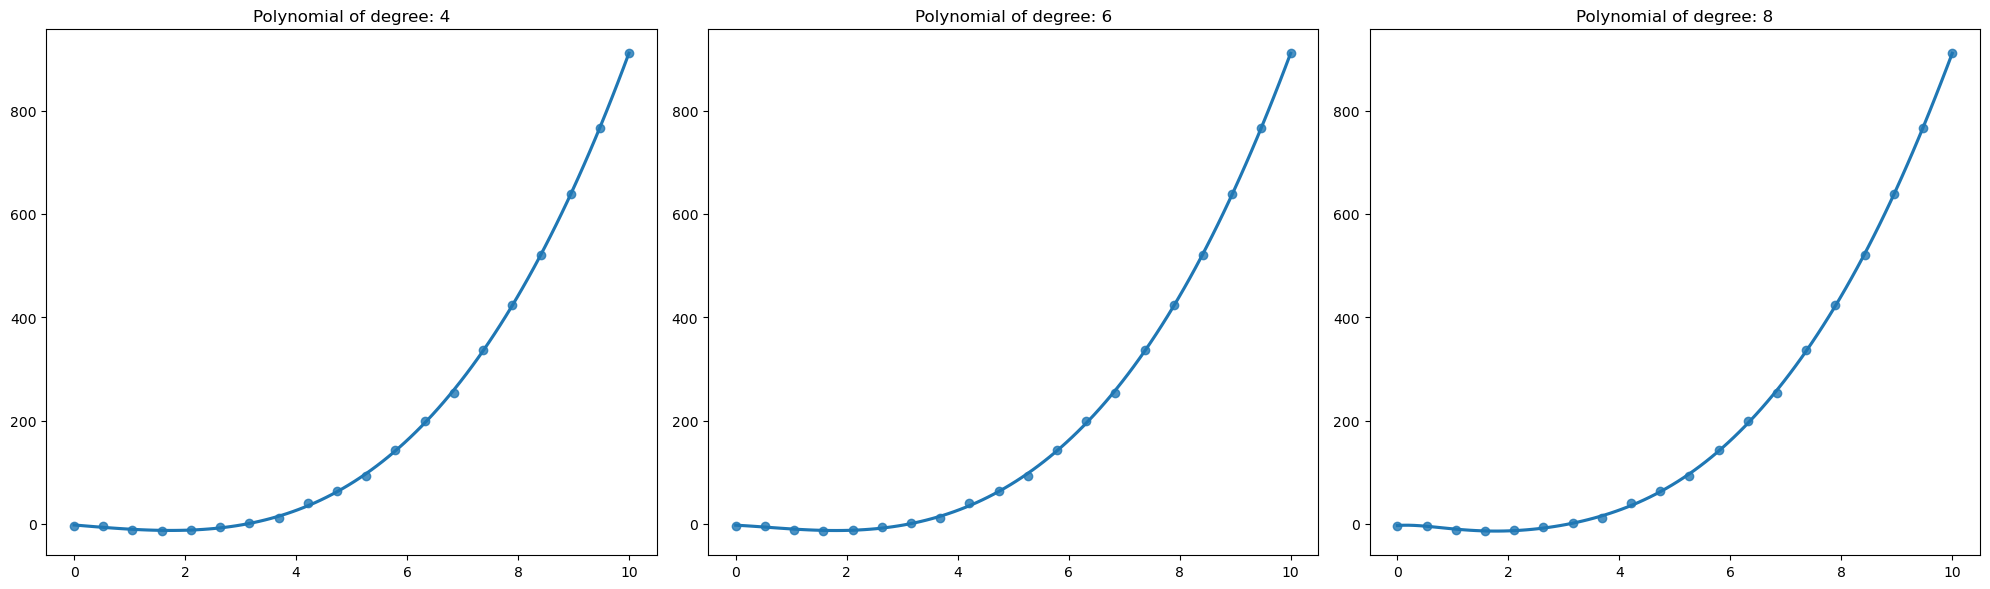

In [222]:
degrees_2 = [4, 6, 8]

fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=100)  # Adjust figsize as needed
j = 0

for i, degree in enumerate(degrees_2):
    sns.regplot(x=x_vals, y=y_vals, order=degree, ax=ax[i], ci=None)
    ax[i].set_title(f"Polynomial of degree: {degree}")

fig.tight_layout()
plt.show()

Polynomial of degree 4:

MAE  : 2.1592
RMSE : 2.6963
Polynomial of degree 6:

MAE  : 2.195
RMSE : 2.6715
Polynomial of degree 8:

MAE  : 2.0497
RMSE : 2.5988


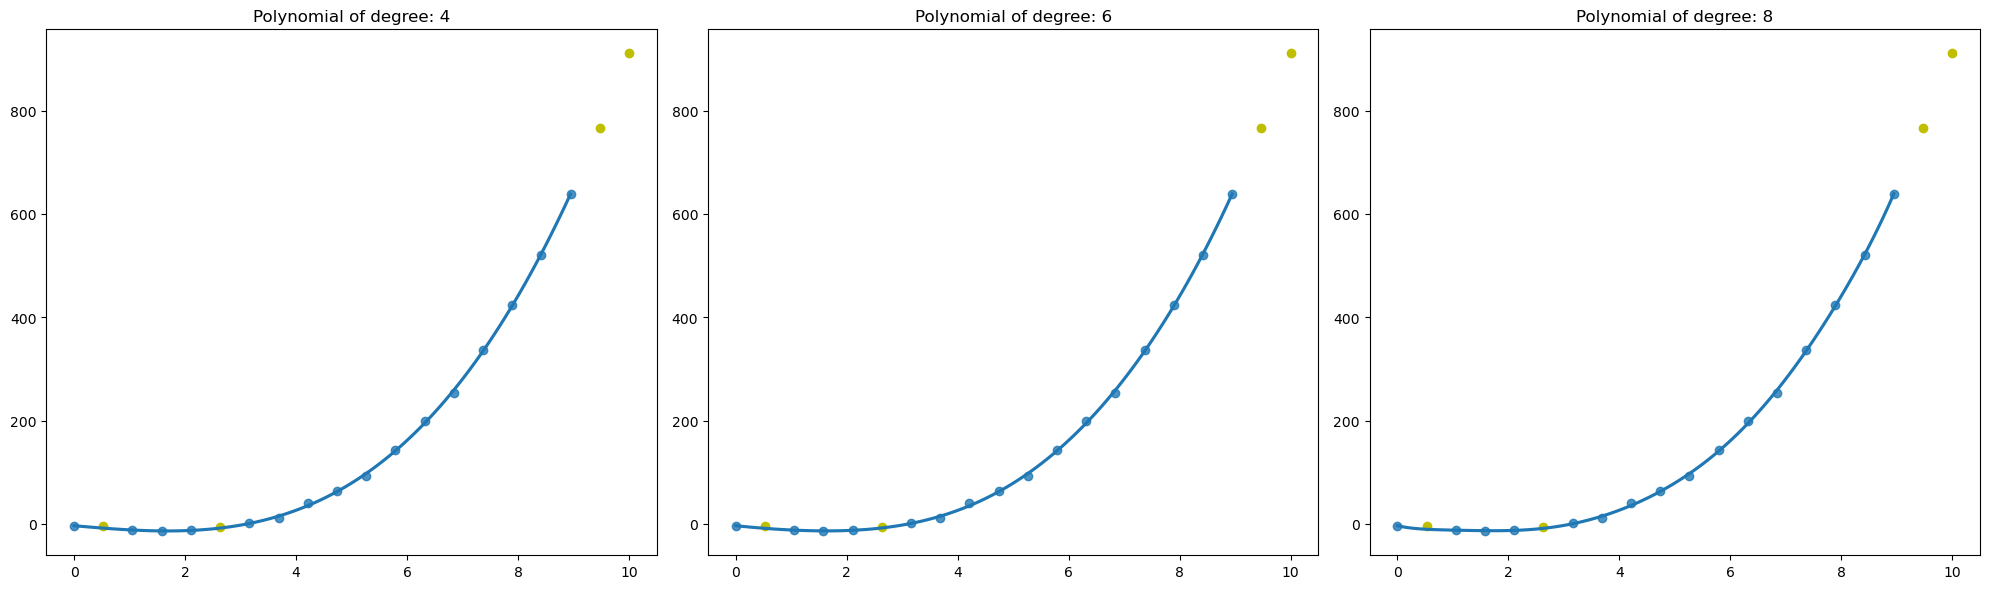

In [223]:
def polynomial_model_degree_4(x, w4, w3, w2, w1, b):    # a linear model is a polynomial of degree 1

    y_hat = w4*x**4 + w3*x**3 + w2*x**2 + w1*x + b

    return y_hat

def polynomial_model_degree_6(x, w6, w5, w4, w3, w2, w1, b):

    y_hat = w6*x**6 + w5*x**5 + w4*x**4 + w3*x**3 + w2*x**2 + w1*x + b

    return y_hat

def polynomial_model_degree_8(x, w8, w7, w6, w5, w4, w3, w2, w1, b):
    
    y_hat = w8*x**8 + w7*x** 7 + w6*x**6 + w5*x**5 + w4*x**4 + w3*x**3 + w2*x**2 + w1*x + b
    
    return y_hat

# degree 4

w4, w3, w2, w1, b = np.polyfit(x_vals, y_vals, deg=4)

y_hats_polynomial_model_degree_4 = np.array([polynomial_model_degree_4(x,w4, w3, w2, w1, b) for x in x_vals])

print('Polynomial of degree 4:', end='\n\n')

polynomial_model_degree_4_MAE = MAE(y_vals, y_hats_polynomial_model_degree_4)
polynomial_model_degree_4_RMSE = RMSE(y_vals, y_hats_polynomial_model_degree_4)

print('MAE  :', polynomial_model_degree_4_MAE)
print('RMSE :', polynomial_model_degree_4_RMSE)

#degree 6

w6, w5, w4, w3, w2, w1, b = np.polyfit(x_vals, y_vals, deg=6)

y_hats_polynomial_model_degree_6 = np.array([polynomial_model_degree_6(x,w6, w5, w4, w3, w2, w1, b) for x in x_vals])

print('Polynomial of degree 6:', end='\n\n')

polynomial_model_degree_6_MAE = MAE(y_vals, y_hats_polynomial_model_degree_6)
polynomial_model_degree_6_RMSE = RMSE(y_vals, y_hats_polynomial_model_degree_6)

print('MAE  :', polynomial_model_degree_6_MAE)
print('RMSE :', polynomial_model_degree_6_RMSE)

#degree 8

w8, w7, w6, w5, w4, w3, w2, w1, b = np.polyfit(x_vals, y_vals, deg=8)

y_hats_polynomial_model_degree_8 = np.array([polynomial_model_degree_8(x,w8, w7, w6, w5, w4, w3, w2, w1, b) for x in x_vals])

print('Polynomial of degree 8:', end='\n\n')

polynomial_model_degree_8_MAE = MAE(y_vals, y_hats_polynomial_model_degree_8)
polynomial_model_degree_8_RMSE = RMSE(y_vals, y_hats_polynomial_model_degree_8)

print('MAE  :', polynomial_model_degree_8_MAE)
print('RMSE :', polynomial_model_degree_8_RMSE)

fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=100)  # Adjust figsize as needed
j = 0

for i, degree in enumerate(degrees_2):
    sns.regplot(x=x_train, y=y_train, order=degree, ax=ax[i], ci=None)   # note that we fit our models only on the train data here
    ax[i].scatter(x_test, y_test, color='y')
    ax[i].set_title(f"Polynomial of degree: {degree}")

fig.tight_layout()
plt.show()

In [224]:
# degree 4 
 

w4, w3, w2, w1, b = np.polyfit(x_train, y_train, deg=4)   # note that we fit only on the train set here

# predict y_hats for the train set
# predict y_hats for the test set

y_hats_train_polynomial_model_degree_4 = np.array([polynomial_model_degree_4(x, w4, w3, w2, w1, b) for x in x_train])
y_hats_test_polynomial_model_degree_4 = np.array([polynomial_model_degree_4(x, w4, w3, w2, w1, b) for x in x_test])

print('Polynomial of degree 4:', end='\n\n')

polynomial_model_train_degree_4_MAE = MAE(y_train, y_hats_train_polynomial_model_degree_4)            # calculate MAE for train set
polynomial_model_train_degree_4_RMSE = RMSE(y_train, y_hats_train_polynomial_model_degree_4)          # calculate MAE for test set

polynomial_model_test_degree_4_MAE = MAE(y_test, y_hats_test_polynomial_model_degree_4)               # calculate MSE for train set
polynomial_model_test_degree_4_RMSE = RMSE(y_test, y_hats_test_polynomial_model_degree_4)             # calculate MSE for test set

print('Train:')
print('MAE :', polynomial_model_train_degree_4_MAE)
print('RMSE:', polynomial_model_train_degree_4_RMSE, end='\n\n')

print('Test:')
print('MAE :', polynomial_model_test_degree_4_MAE)
print('RMSE:', polynomial_model_test_degree_4_RMSE)

# degree 6 
 

w6, w5, w4, w3, w2, w1, b = np.polyfit(x_train, y_train, deg=6)   # note that we fit only on the train set here

# predict y_hats for the train set
# predict y_hats for the test set

y_hats_train_polynomial_model_degree_6 = np.array([polynomial_model_degree_6(x, w6, w5, w4, w3, w2, w1, b) for x in x_train])
y_hats_test_polynomial_model_degree_6 = np.array([polynomial_model_degree_6(x, w6, w5, w4, w3, w2, w1, b) for x in x_test])

print('\n Polynomial of degree 6:', end='\n\n')

polynomial_model_train_degree_6_MAE = MAE(y_train, y_hats_train_polynomial_model_degree_6)            # calculate MAE for train set
polynomial_model_train_degree_6_RMSE = RMSE(y_train, y_hats_train_polynomial_model_degree_6)          # calculate MAE for test set

polynomial_model_test_degree_6_MAE = MAE(y_test, y_hats_test_polynomial_model_degree_6)               # calculate MSE for train set
polynomial_model_test_degree_6_RMSE = RMSE(y_test, y_hats_test_polynomial_model_degree_6)             # calculate MSE for test set

print('Train:')
print('MAE :', polynomial_model_train_degree_6_MAE)
print('RMSE:', polynomial_model_train_degree_6_RMSE, end='\n\n')

print('Test:')
print('MAE :', polynomial_model_test_degree_6_MAE)
print('RMSE:', polynomial_model_test_degree_6_RMSE)

# degree 8 
 

w8, w7, w6, w5, w4, w3, w2, w1, b = np.polyfit(x_train, y_train, deg=8)   # note that we fit only on the train set here

# predict y_hats for the train set
# predict y_hats for the test set

y_hats_train_polynomial_model_degree_8 = np.array([polynomial_model_degree_8(x, w8, w7, w6, w5, w4, w3, w2, w1, b) for x in x_train])
y_hats_test_polynomial_model_degree_8 = np.array([polynomial_model_degree_8(x, w8, w7, w6, w5, w4, w3, w2, w1, b) for x in x_test])

print('\nPolynomial of degree 8:', end='\n\n')

polynomial_model_train_degree_8_MAE = MAE(y_train, y_hats_train_polynomial_model_degree_8)            # calculate MAE for train set
polynomial_model_train_degree_8_RMSE = RMSE(y_train, y_hats_train_polynomial_model_degree_8)          # calculate MAE for test set

polynomial_model_test_degree_8_MAE = MAE(y_test, y_hats_test_polynomial_model_degree_8)               # calculate MSE for train set
polynomial_model_test_degree_8_RMSE = RMSE(y_test, y_hats_test_polynomial_model_degree_8)             # calculate MSE for test set

print('Train:')
print('MAE :', polynomial_model_train_degree_8_MAE)
print('RMSE:', polynomial_model_train_degree_8_RMSE, end='\n\n')

print('Test:')
print('MAE :', polynomial_model_test_degree_8_MAE)
print('RMSE:', polynomial_model_test_degree_8_RMSE)



Polynomial of degree 4:

Train:
MAE : 2.2013
RMSE: 2.7994

Test:
MAE : 3.3341
RMSE: 3.6847

 Polynomial of degree 6:

Train:
MAE : 2.1813
RMSE: 2.793

Test:
MAE : 6.0842
RMSE: 7.4434

Polynomial of degree 8:

Train:
MAE : 2.0902
RMSE: 2.7407

Test:
MAE : 37.9473
RMSE: 59.6161


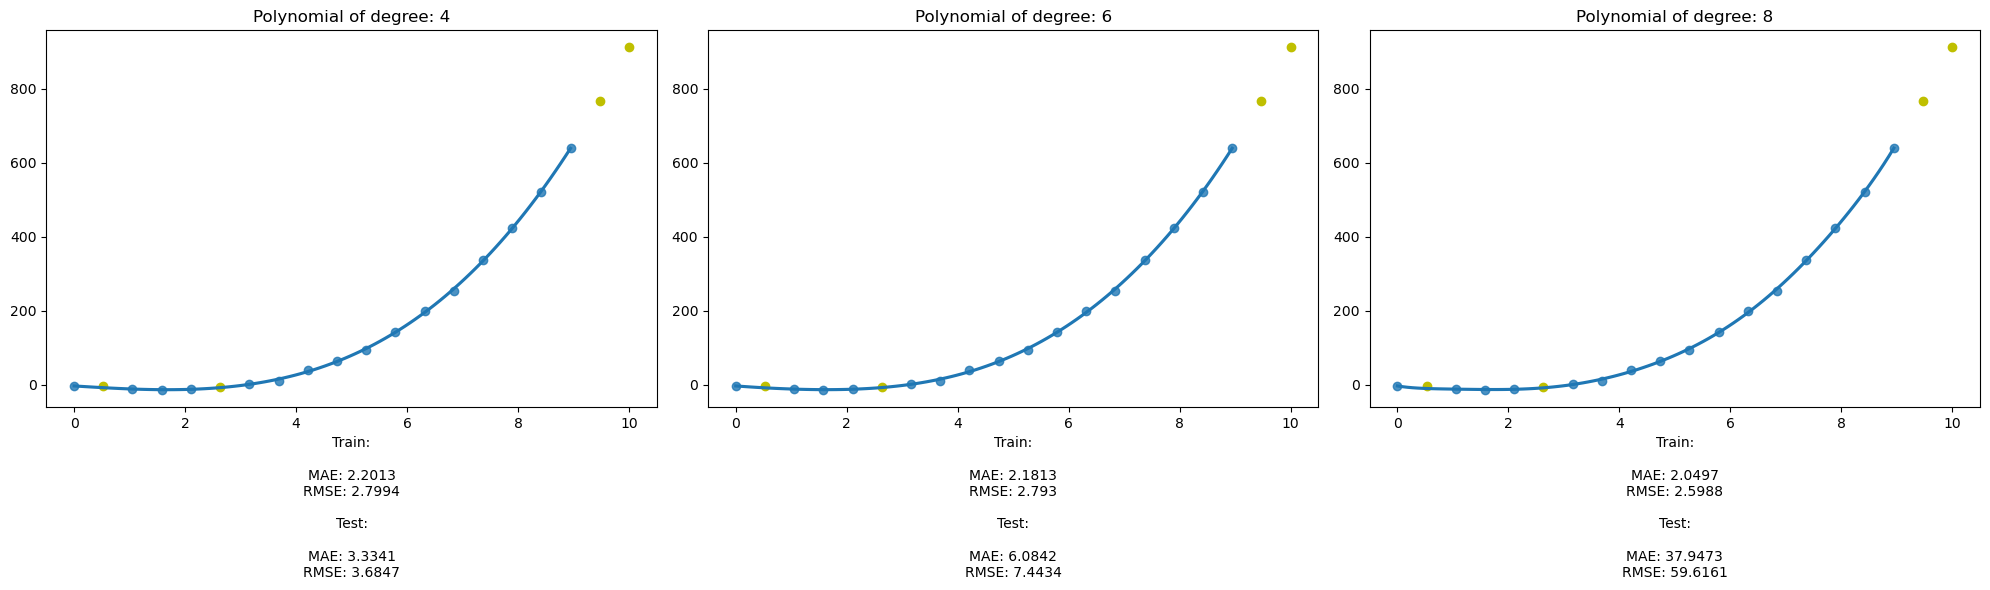

In [225]:
degrees = [4, 6, 8]
all_train_maes = [polynomial_model_train_degree_4_MAE, polynomial_model_train_degree_6_MAE, polynomial_model_degree_8_MAE]
all_train_mses = [polynomial_model_train_degree_4_RMSE, polynomial_model_train_degree_6_RMSE, polynomial_model_degree_8_RMSE]

all_test_maes = [polynomial_model_test_degree_4_MAE, polynomial_model_test_degree_6_MAE, polynomial_model_test_degree_8_MAE]
all_test_mses = [polynomial_model_test_degree_4_RMSE, polynomial_model_test_degree_6_RMSE, polynomial_model_test_degree_8_RMSE]


fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=100) 

for i, degree in enumerate(degrees):
    sns.regplot(x=x_train, y=y_train, order=degree, ax=ax[i], ci=None)
    ax[i].scatter(x_test, y_test, color='y')
    ax[i].set_title(f"Polynomial of degree: {degree}")
    ax[i].set_xlabel(f"Train:\n\nMAE: {all_train_maes[i]}\nRMSE: {all_train_mses[i]}\n\nTest:\n\nMAE: {all_test_maes[i]}\nRMSE: {all_test_mses[i]}") 

fig.tight_layout()
plt.show()